In [3]:
import numpy as np

height = [60, 62, 65,  68,  70,  72,  75,  77,  80,  82]
weight = [100, 110, 120, 130, 140, 150, 160, 170, 180, 190]

np.corrcoef(height, weight)[0][1]


0.9990716178370008

In [4]:
import pandas as pd

df = pd.read_csv('../../datasets/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [6]:
df.charges.corr(df.bmi)

0.19834096883362887

In [11]:
# t value
from scipy import stats
r, p = stats.pearsonr(df.charges, df.age)

print(round(r, 4))
print(round(p, 29)) # (Correlation, P_value)

0.299
5.0000000000000004e-29


In [9]:
stats.ttest_ind(df.charges, df.bmi)

Ttest_indResult(statistic=39.99111666529813, pvalue=1.5383565479086166e-274)

In [18]:
#coff_df = pd.DataFrame(df.corr().unstack().reset_index())
corr_df = pd.DataFrame(columns=['r','p'])

for col in df:
    print(col)
    if pd.api.types.is_numeric_dtype(df[col]) and col != 'charges':
        r, p = stats.pearsonr(df.charges, df[col])
        corr_df.loc[col] = [round(r, 3), round(p, 3)]

corr_df

age
sex
bmi
children
smoker
region
charges


,r,p
age,0.299,0.000
bmi,0.198,0.000
children,0.068,0.013


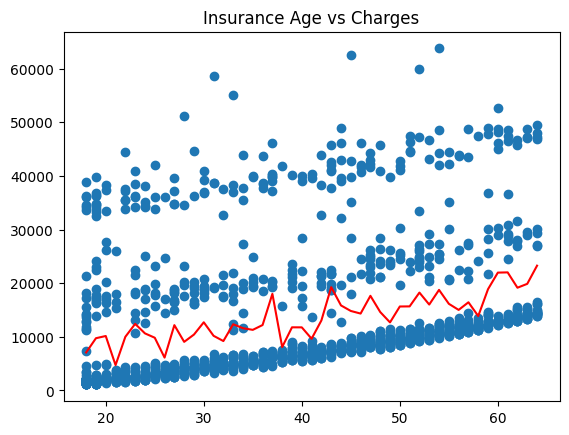

In [23]:
import matplotlib.pyplot as plt

plt.scatter(df.age, df.charges)
plt.title('Insurance Age vs Charges')
# add average line per age
plt.plot(df.groupby('age').charges.mean(), color='red')
plt.show()

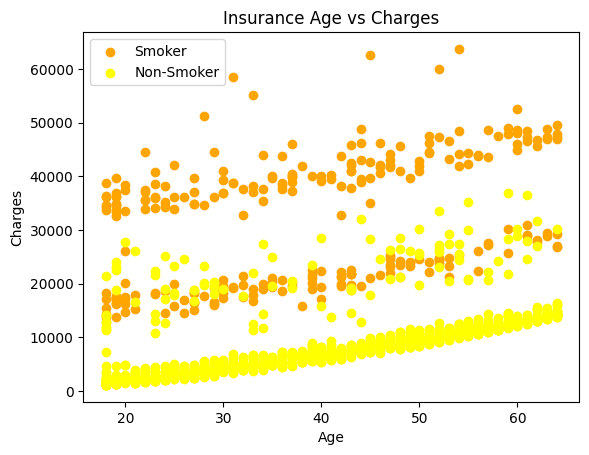

In [36]:
# Smoker vs Non-Smoker
df_smoker = df[df.smoker == 'yes']
df_non_smoker = df[df.smoker == 'no']

# plot smoker and non smoker with different color
plt.scatter(df_smoker.age, df_smoker.charges, color='orange', label='Smoker')
plt.scatter(df_non_smoker.age, df_non_smoker.charges, color='yellow', label='Non-Smoker')
plt.title('Insurance Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
# legend
plt.legend(['Smoker', 'Non-Smoker'])
# opacity
plt.gca().set_alpha(0.5)
plt.show()

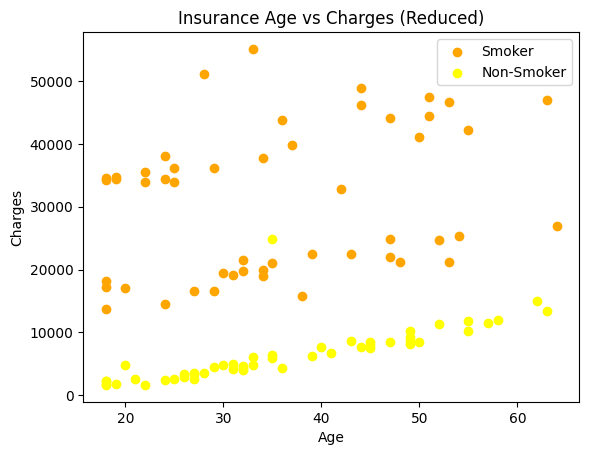

In [34]:
# Smoker vs Non-Smoker
df_smoker_reduced = df_smoker.sample(50)
df_non_smoker_reduced = df_non_smoker.sample(50)

# plot smoker and non smoker with different color
plt.scatter(df_smoker_reduced.age, df_smoker_reduced.charges, color='orange', label='Smoker')
plt.scatter(df_non_smoker_reduced.age, df_non_smoker_reduced.charges, color='yellow', label='Non-Smoker')
plt.title('Insurance Age vs Charges (Reduced)')
plt.xlabel('Age')
plt.ylabel('Charges')
# legend
plt.legend(['Smoker', 'Non-Smoker'])
plt.show()

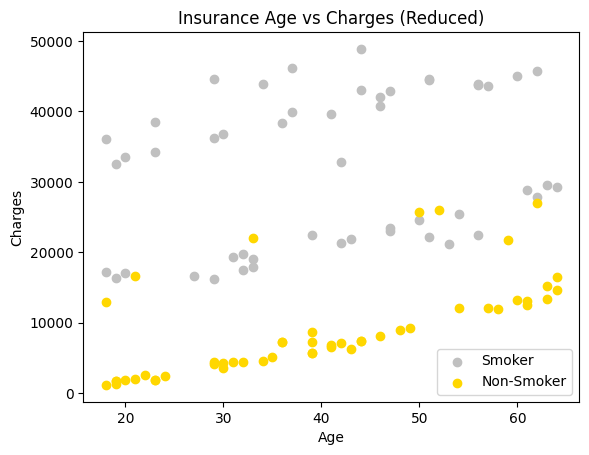

In [32]:
# Smoker vs Non-Smoker
df_smoker_reduced = df_smoker.sample(50)
df_non_smoker_reduced = df_non_smoker.sample(50)

# plot smoker and non smoker with different color
plt.scatter(df_smoker_reduced.age, df_smoker_reduced.charges, color='silver', marker='o', label='Smoker')
plt.scatter(df_non_smoker_reduced.age, df_non_smoker_reduced.charges, color='gold', marker='o', label='Non-Smoker')
plt.title('Insurance Age vs Charges (Reduced)')
plt.xlabel('Age')
plt.ylabel('Charges')
# legend
plt.legend(['Smoker', 'Non-Smoker'])
plt.show()

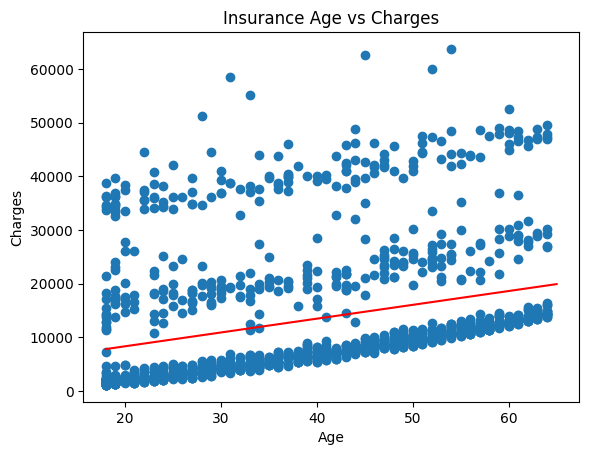

In [44]:
m, b, r, p, err = stats.linregress(df.age, df.charges)

# y = mx + b
# y = slope(x) + intercept

x = range(18, df.age.max() + 2)
y = m * x + b
plt.plot(x, y, color='red')
plt.scatter(df.age, df.charges)
plt.title('Insurance Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

### stats.linregress
LinregressResult(slope=0.00014285714285714285, intercept=0.0, rvalue=0.0, pvalue=1.0, stderr=0.0)
- Slope is the slope of the line
- Intercept is the y-intercept of the line
- R-value is the correlation coefficient
- P-value is the two-sided p-value for a hypothesis test whose null hypothesis is that the slope is zero, using Wald Test with t-distribution of the test statistic.
- stderr is the standard error of the estimated gradient.

heteroscedasticity is a situation in which the error term is not the same across the values of the independent variable. In other words, the variance of the error term is not constant, and this is a violation of the key assumption of the linear regression model.

In [46]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
from statsmodels.formula.api import ols

model = ols(formula='charges ~ age', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     131.2
Date:                Wed, 22 Mar 2023   Prob (F-statistic):           4.89e-29
Time:                        21:23:13   Log-Likelihood:                -14415.
No. Observations:                1338   AIC:                         2.883e+04
Df Residuals:                    1336   BIC:                         2.884e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3165.8850    937.149      3.378      0.0

In [48]:
white_test = het_white(model.resid, model.model.exog)
breushpagan_test = het_breuschpagan(model.resid, model.model.exog)

output_df = pd.DataFrame(columns=['LM statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value'])
output_df.loc['White'] = white_test
output_df.loc['Breush-Pagan'] = breushpagan_test

output_df

,LM statistic,LM-Test p-value,F-Statistic,F-Test p-value
White,0.002713,0.998645,0.001353,0.998648
breushpagan,0.000413,0.983776,0.000413,0.983792


white: LM stas - Extreme, p value - extreme lowest, all four of them have extremely small f and low p value.
indicating that the difference between the residuals across all values of x is fairly consistent